### Develop LSTM Models For Univariate Time Series Forecasting

In [1]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [2]:
import tensorflow as tf

In [ ]:
1.X----2.x

In [3]:
tf.__version__

'2.18.0'

In [4]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [5]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [6]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [7]:
X.shape

(6, 3)

In [10]:
y.shape

(6,)

In [8]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [9]:
X.shape

(6, 3, 1)

### Building LSTM Model

In [11]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 33830.7891
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 33423.5430
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 33044.0430
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 32736.4473
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 32424.5762
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 32212.6074
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 32074.2988
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 31981.7988
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 31866.6543
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 31733.5137
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 31578.8750
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 31397.0781
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 31175.5859
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 30896.3438
Epoch 15/300
1/1 ━━━━━━━━━━━━━━━━━━━━

### Predicting For the next 10 data

In [12]:
# demonstrate prediction for next 10 days
import numpy as np
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)

[222.03644]
1 day input [196.         210.         222.03643799]
1 day output [[233.82677]]
2 day input [210.         222.03643799 233.82676697]
2 day output [[246.35736]]
3 day input [222.03644 233.82677 246.35736]
3 day output [[258.56046]]
4 day input [233.82677 246.35736 258.56046]
4 day output [[271.06827]]
5 day input [246.35736 258.56046 271.06827]
5 day output [[284.12564]]
6 day input [258.56046 271.06827 284.12564]
6 day output [[297.3107]]
7 day input [271.06827 284.12564 297.3107 ]
7 day output [[310.9556]]
8 day input [284.12564 297.3107  310.9556 ]
8 day output [[325.18146]]
9 day input [297.3107  310.9556  325.18146]
9 day output [[339.74545]]
[222.03644, 233.82677, 246.35736, 258.56046, 271.06827, 284.12564, 297.3107, 310.9556, 325.18146, 339.74545]


In [13]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [14]:
len(timeseries_data)

9

In [15]:
lst_output

[222.03644,
 233.82677,
 246.35736,
 258.56046,
 271.06827,
 284.12564,
 297.3107,
 310.9556,
 325.18146,
 339.74545]

### Visualizaing The Output

In [16]:
import matplotlib.pyplot as plt

In [17]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

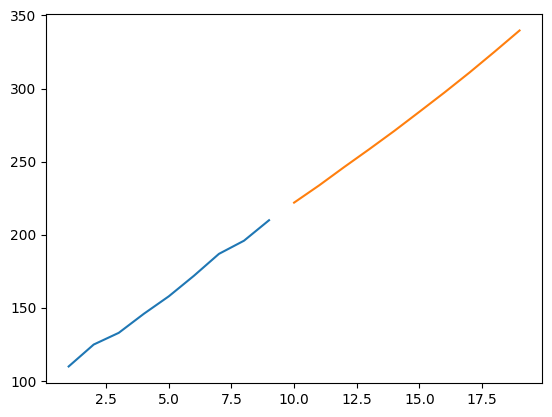

In [18]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
